Some things of note since the package programmers of R projects are evil. 

- Constrained proportion = Variation explained
- Unconstrained proportion = Variation not explained

In [1]:
library(ade4)
library(vegan)
library(packfor)

Loading required package: permute
Loading required package: lattice
This is vegan 2.4-1

Attaching package: ‘vegan’

The following object is masked from ‘package:ade4’:

    cca

packfor: R Package for Forward Selection (Canoco Manual p.49)
version0.0-8


In [2]:
# Data
data(doubs)
env = doubs$env
spe = doubs$fish

In [3]:
# Hellinger transformation of species data
spe.hel = decostand(spe, 'hellinger')
summary(spe.hel)

      Cogo              Satr             Phph             Neba       
 Min.   :0.00000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.00000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.1183  
 Median :0.00000   Median :0.1838   Median :0.2673   Median :0.2844  
 Mean   :0.07056   Mean   :0.2390   Mean   :0.2495   Mean   :0.2630  
 3rd Qu.:0.11307   3rd Qu.:0.4330   3rd Qu.:0.4627   3rd Qu.:0.4445  
 Max.   :0.33333   Max.   :1.0000   Max.   :0.6030   Max.   :0.5590  
      Thth              Teso              Chna              Chto        
 Min.   :0.00000   Min.   :0.00000   Min.   :0.00000   Min.   :0.00000  
 1st Qu.:0.00000   1st Qu.:0.00000   1st Qu.:0.00000   1st Qu.:0.00000  
 Median :0.00000   Median :0.00000   Median :0.00000   Median :0.00000  
 Mean   :0.06895   Mean   :0.06585   Mean   :0.06667   Mean   :0.07409  
 3rd Qu.:0.08041   3rd Qu.:0.08041   3rd Qu.:0.15140   3rd Qu.:0.15119  
 Max.   :0.39736   Max.   :0.35355   Max.   :0.25820   Max.   :0.31623  

In [4]:
# Standardisation of environmental data
env.std = decostand(env, 'standardize')
summary(env.std)

      dfs                alt               slo               flo          
 Min.   :-1.34337   Min.   :-1.1404   Min.   :-1.5353   Min.   :-1.18004  
 1st Qu.:-0.95562   1st Qu.:-0.8604   1st Qu.:-0.8582   1st Qu.:-0.99443  
 Median :-0.09097   Median :-0.3187   Median :-0.1784   Median :-0.00558  
 Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.00000  
 3rd Qu.: 0.81504   3rd Qu.: 1.1073   3rd Qu.: 0.5852   3rd Qu.: 0.35212  
 Max.   : 1.89828   Max.   : 1.6674   Max.   : 3.1639   Max.   : 2.58531  
       pH               har               pho                 nit          
 Min.   :-2.0149   Min.   :-2.7334   Min.   :-0.624873   Min.   :-1.06412  
 1st Qu.:-0.7196   1st Qu.:-0.1097   1st Qu.:-0.493661   1st Qu.:-0.81295  
 Median :-0.2878   Median : 0.1720   Median :-0.311105   Median :-0.03821  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.000000   Mean   : 0.00000  
 3rd Qu.: 0.2878   3rd Qu.: 0.6315   3rd Qu.: 0.002662   3rd Qu.: 0.54550  
 Max.   : 3.1663   


Call:
rda(formula = spe.hel ~ dfs + alt + slo + flo + pH + har + pho +      nit + amm + oxy + bdo, data = env.std) 

Partitioning of variance:
              Inertia Proportion
Total          0.5023     1.0000
Constrained    0.3557     0.7081
Unconstrained  0.1467     0.2919

Eigenvalues, and their contribution to the variance 

Importance of components:
                        RDA1   RDA2    RDA3    RDA4     RDA5     RDA6     RDA7
Eigenvalue            0.2218 0.0545 0.03245 0.02186 0.009033 0.006009 0.003783
Proportion Explained  0.4415 0.1085 0.06460 0.04351 0.017980 0.011960 0.007530
Cumulative Proportion 0.4415 0.5500 0.61463 0.65814 0.676120 0.688080 0.695610
                          RDA8     RDA9     RDA10     RDA11     PC1     PC2
Eigenvalue            0.002822 0.001944 0.0008515 0.0006343 0.04218 0.02887
Proportion Explained  0.005620 0.003870 0.0017000 0.0012600 0.08396 0.05746
Cumulative Proportion 0.701230 0.705100 0.7068000 0.7080600 0.79202 0.84948
                       

[1] "*** Global Adj R2 ***"
[1] 0.5296495
Testing variable 1
Testing variable 2
Testing variable 3
Testing variable 4
Procedure stopped (adjR2thresh criteria) adjR2cum = 0.550018 with 4 variables (superior to 0.529649)


variables,order,R2,R2Cum,AdjR2Cum,F,pval
dfs,1,0.36632470,0.3663247,0.3436934,16.186668,0.001
oxy,10,0.12346520,0.4897899,0.4519966,6.533701,0.001
bdo,11,0.07476725,0.5645572,0.5143137,4.464302,0.002
alt,2,0.04752731,0.6120845,0.5500180,3.062993,0.004


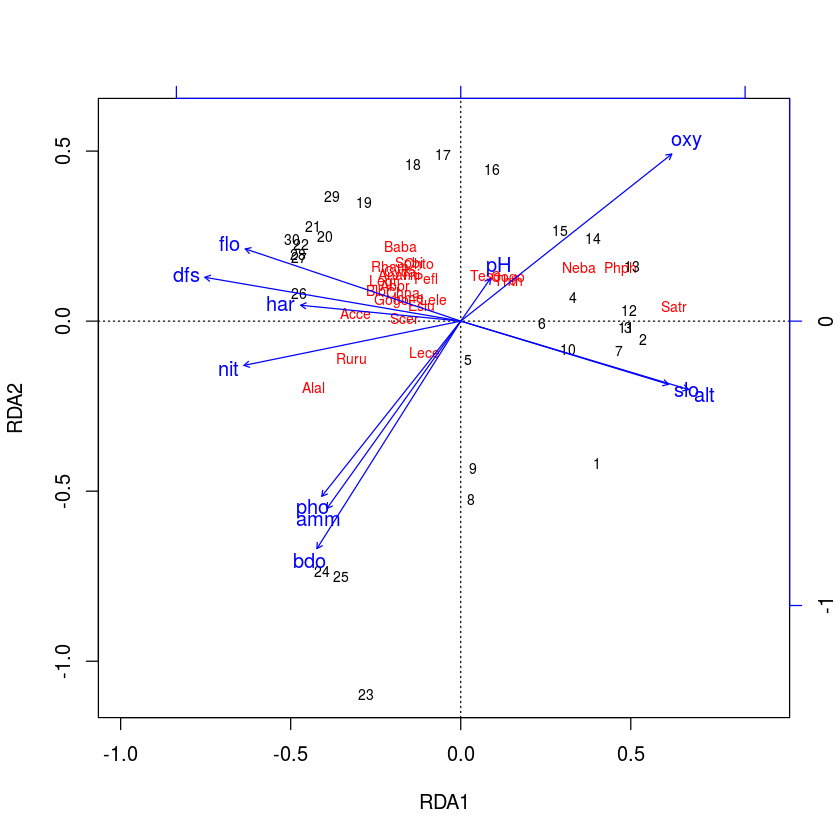

In [5]:
# Forward selection of significant environmental variables 
# using double criterion set by Blanchet et al. 2008

#A. RDA with all explanatory variables
spe.rda.all=rda(spe.hel ~ ., data=env.std)
summary(spe.rda.all)
plot(spe.rda.all)

#B. Global adjusted R2
R2a.all = RsquareAdj(spe.rda.all)$adj.r.squared
print('*** Global Adj R2 ***')
print(R2a.all)

#C. Forward selection
forward.sel(spe.hel, env.std, adjR2thresh=R2a.all)


Call:
rda(formula = spe.hel ~ dfs + oxy + bdo + alt, data = env.std) 

Partitioning of variance:
              Inertia Proportion
Total          0.5023     1.0000
Constrained    0.3075     0.6121
Unconstrained  0.1949     0.3879

Eigenvalues, and their contribution to the variance 

Importance of components:
                        RDA1    RDA2    RDA3    RDA4     PC1     PC2     PC3
Eigenvalue            0.2125 0.05159 0.02758 0.01585 0.05142 0.03772 0.02474
Proportion Explained  0.4229 0.10270 0.05490 0.03156 0.10235 0.07509 0.04925
Cumulative Proportion 0.4229 0.52562 0.58053 0.61208 0.71444 0.78953 0.83878
                          PC4     PC5     PC6      PC7      PC8      PC9
Eigenvalue            0.01722 0.01335 0.01195 0.009796 0.007069 0.004866
Proportion Explained  0.03428 0.02657 0.02380 0.019500 0.014070 0.009690
Cumulative Proportion 0.87307 0.89964 0.92344 0.942940 0.957010 0.966690
                          PC10    PC11     PC12     PC13     PC14     PC15
Eigenvalue    

[1] "VIF (Assessing Multicollinearity)"


dfs       oxy       bdo       alt 
14.813944  5.645729  4.183194 12.589886

,Df,Variance,F,Pr(>F)
Model,4,0.3074763,9.861755,0.001
Residual,25,0.1948666,NA,NA


,Df,Variance,F,Pr(>F)
RDA1,1,0.21245286,27.256189,0.001
RDA2,1,0.05159101,6.618760,0.001
RDA3,1,0.02758011,3.538332,0.001
RDA4,1,0.01585230,2.033738,0.047
Residual,25,0.19486662,NA,NA


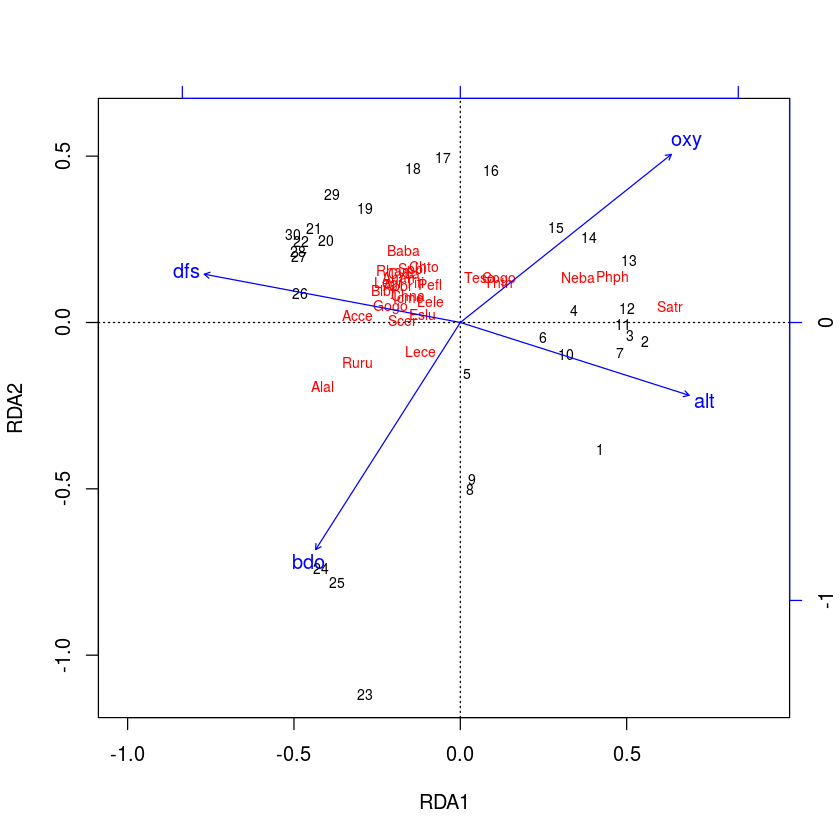

In [6]:
#A. RDA with only significant variables
spe.rda.sel=rda(spe.hel ~ dfs + oxy + bdo + alt, data=env.std)
summary(spe.rda.sel)
plot(spe.rda.sel)

#B. Assessing multicollinearity
print('VIF (Assessing Multicollinearity)')
vif.cca(spe.rda.sel)

#C. Testing significance of RDA

#i) Global test of the RDA result
anova.cca(spe.rda.sel, step=1000)

#ii) Tests of all canonical axes
anova.cca(spe.rda.sel, by = "axis", step=1000)

<center>The End!</center>
<center>_Stephen Anthony Rose_</center>